In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter
import time

import seaborn as sns
from youtube import youtube_search

In [2]:
pltWidth, pltHeight = 20, 10
plt.rcParams['figure.figsize'] = (pltWidth, pltHeight)

In [3]:
def addDicts(finalDict, newDict):
    for key, value in newDict.items():
        finalDict[key] = finalDict[key] + value
    return finalDict

In [4]:
results, nextToken = None, None
for i in range(50):
    try:
        test, nextToken = youtube_search("Hurricane", max_results=50, token=nextToken)
    except KeyError:
        break
    time.sleep(0.01)
    results = addDicts(results, test) if results else test
results.keys()

dict_keys(['tags', 'channelTitle', 'title', 'videoId', 'viewCount', 'likeCount', 'dislikeCount', 'commentCount', 'favoriteCount'])

In [5]:
df = pd.DataFrame(data=results)
df1 = df[['title','viewCount','channelTitle','commentCount','likeCount','dislikeCount','tags','favoriteCount','videoId']]
df1.columns = ['Title','Views','Channel','Comment Count','Likes','Dislikes','Tags','Favourite Count','Video ID']

numeric_dtype = ['Views', 'Comment Count', 'Likes', 'Dislikes', 'Favourite Count']
for i in numeric_dtype:
    df1[i] = df1[i].astype(int)
df1.sort_values(by=['Views'], ascending=False, inplace=True)

In [6]:
len(df)

495

In [7]:
ImagineDragons = df1.iloc[:50]#[df1['Channel']=='National Geographic']
ImagineDragons.head()

,Title,Views,Channel,Comment Count,Likes,Dislikes,Tags,Favourite Count,Video ID
3,Bridgit Mendler - Hurricane (Official Video),129646117,BridgitMendlerVEVO,84806,1084274,30098,"[Bridgit, Mendler, Hurricane, Hollywood, Pop]",0,t-njAuS7eTQ
0,Luke Combs - Hurricane,113355502,LukeCombsVEVO,7988,423016,32398,"[Sony Music, Nashville, country, country music...",0,BixwVsiDdZM
396,Luke Combs - When It Rains It Pours,83061975,LukeCombsVEVO,10482,305705,32027,"[when it rains it pours, luke combs video, whe...",0,uXyxFMbqKYA
4,Halsey - Hurricane,34069118,HalseyVEVO,5952,263938,4928,"[Halsey, Hurricane, Astralwerks, (ASW), Altern...",0,FR9G7ioLLmc
95,Bridgit Mendler canta ¨Hurricane¨ con los chic...,24266204,DisneyChannelLA,6106,163542,6071,"[Violetta, violeta, Tini Stoessel, Tini, Canci...",0,np3aSK66K-c


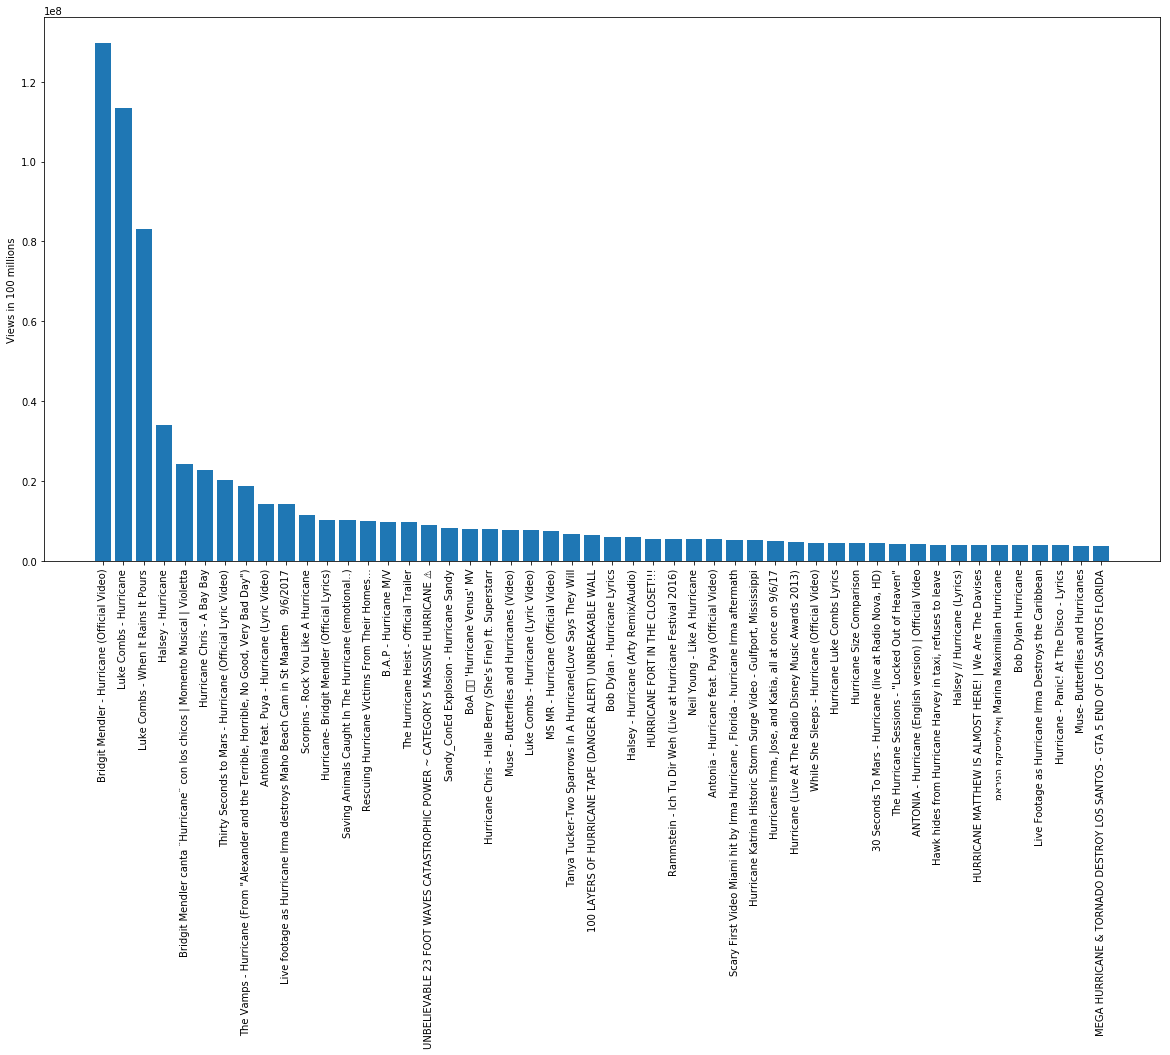

In [8]:
ImagineDragons = ImagineDragons.sort_values(ascending=False,by='Views')
plt.bar(range(ImagineDragons.shape[0]), ImagineDragons['Views'])
plt.xticks(range(ImagineDragons.shape[0]), ImagineDragons['Title'], rotation=90)
plt.ylabel('Views in 100 millions')

plt.show()